In [1]:
import pandas as pd #   تحليل بيانات أساسية غير مرتبة بحيث ينتج عن هذا التحليل تحويل البيانات الى شكل أخر يُمكن فهمه والتعامل معه
import seaborn as sns# لإنشاء مجموعة متنوعة من الرسوم البيانية،
import numpy as np #للتعامل مع مصفوفات والعنليات الحسابية
import scipy.stats as stats# للقيام  يعملية الاحصاء 
import matplotlib.pyplot as plt # تحويل البيانات الرقمية الى رسومات
import plotly.express as px #رسم
%matplotlib inline
import matplotlib.pyplot as plt  #

In [2]:
dj=pd.read_excel(r'C:\Users\dohan\Desktop\طويق\Injured_1439.xlsx')
df=pd.read_excel(r'C:\Users\dohan\Desktop\طويق\deaths_1439.xlsx')

In [3]:
dj.rename(columns={"أناث":"Female","ذكور":"M","خارج المدينه":"outside the city","داخل المدينه":"Inside the city","أقل من 18":"Under 18","من 30 على 40":"From 30 to 40","من18 إلى 30":"From 18 to 30","من40إلى50":"From 40 to 50","من50فأكثر":"More than 50","سعودى":"Saudi","غير سعودى":"Non-Saudi","الشهر":"the month","المنطقة":"Region","المجموع":"Total","المجموع.1":"Total1","المجموع.2":"Total2","المجموع.3":"Total3"},inplace=True)#تغير اسماء عامود
dj.head()
### تعديل المسميات للاعمده من العربي الى الانجليزي 

,the month,Region,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,محرم,الرياض- عدد الأشخاص المصابين حسب الجنس,364.0,29.0,393.0,291.0,102.0,393.0,66.0,97.0,126.0,73.0,31.0,393.0,213.0,180.0,393.0
1,صفر,الرياض- عدد الأشخاص المصابين حسب الجنس,387.0,46.0,433.0,276.0,157.0,433.0,44.0,117.0,145.0,79.0,48.0,433.0,271.0,162.0,433.0
2,ربيع أول,الرياض- عدد الأشخاص المصابين حسب الجنس,361.0,94.0,455.0,284.0,171.0,455.0,115.0,124.0,108.0,89.0,19.0,455.0,278.0,177.0,455.0
3,ربيع ثانى,الرياض- عدد الأشخاص المصابين حسب الجنس,378.0,49.0,427.0,295.0,132.0,427.0,132.0,119.0,103.0,51.0,22.0,427.0,238.0,189.0,427.0
4,جمادى أول,الرياض- عدد الأشخاص المصابين حسب الجنس,311.0,47.0,358.0,262.0,96.0,358.0,61.0,111.0,89.0,52.0,45.0,358.0,207.0,151.0,358.0


In [4]:
dj['the month'].replace({'محرم':'Muharram', 'صفر':'Safar','ربيع أول':'Rabi_Awal','ربيع ثانى':'Rabie_Thani',
                               'جمادى أول':'Jumada-Awal','جمادى ثانى':'Jumada-Thani','رجب':'Rajab','شعبان':'Shabaan',
                               'رمضان':'Ramadan','شوال':'Shawal','ذى القعدة':'Dhu-AlQadah','ذى الحجة':'Dhul-Hijjah'},
                                inplace = True)
dj            
## تعديل مسميات الاشهر الى اللغه تالانجليزية 

,the month,Region,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,Muharram,الرياض- عدد الأشخاص المصابين حسب الجنس,364.0,29.0,393.0,291.0,102.0,393.0,66.0,97.0,126.0,73.0,31.0,393.0,213.0,180.0,393.0
1,Safar,الرياض- عدد الأشخاص المصابين حسب الجنس,387.0,46.0,433.0,276.0,157.0,433.0,44.0,117.0,145.0,79.0,48.0,433.0,271.0,162.0,433.0
2,Rabi_Awal,الرياض- عدد الأشخاص المصابين حسب الجنس,361.0,94.0,455.0,284.0,171.0,455.0,115.0,124.0,108.0,89.0,19.0,455.0,278.0,177.0,455.0
3,Rabie_Thani,الرياض- عدد الأشخاص المصابين حسب الجنس,378.0,49.0,427.0,295.0,132.0,427.0,132.0,119.0,103.0,51.0,22.0,427.0,238.0,189.0,427.0
4,Jumada-Awal,الرياض- عدد الأشخاص المصابين حسب الجنس,311.0,47.0,358.0,262.0,96.0,358.0,61.0,111.0,89.0,52.0,45.0,358.0,207.0,151.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Shabaan,القريات,21.0,1.0,22.0,15.0,7.0,22.0,10.0,5.0,5.0,2.0,0.0,22.0,19.0,3.0,22.0
192,Ramadan,القريات,30.0,9.0,39.0,8.0,31.0,39.0,16.0,6.0,13.0,2.0,2.0,39.0,27.0,12.0,39.0
193,Shawal,القريات,15.0,1.0,16.0,6.0,10.0,16.0,1.0,8.0,5.0,1.0,1.0,16.0,16.0,0.0,16.0
194,Dhu-AlQadah,القريات,19.0,0.0,19.0,8.0,11.0,19.0,1.0,16.0,1.0,1.0,0.0,19.0,17.0,2.0,19.0


In [5]:
dj['Region'].replace({'الرياض- عدد الأشخاص المصابين حسب الجنس':'Riyadh', 'القريات':'Qurayyat',
                                'المدينه المنوره- عــد د الأشخاص المصابين حسب الجنس':'Madinah',
                                'الشرقيه- عــدد الأشخاص المصابين حسب الجنس':'Eastern_Province',
                                'الحـــدو د الشماليه- عــدد الأشخاص المصابين حسب الجنس':'Northern_border','تبوك':'Tabuk',
                                'الجوف':'Al-Jouf','حائل':'Hail','نجران':'Najran','القصيم':'Qassim','الباحه':'Albaha',
                                'عسير':'Assir','جازان':'Jazan','جده':'Jeddah', 'الطائف':'Taif','العاصمه':'Makkah'},inplace = True)
dj
## تعديل مسميات المناطق الى اللغه الانجليزية 

,the month,Region,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,Muharram,Riyadh,364.0,29.0,393.0,291.0,102.0,393.0,66.0,97.0,126.0,73.0,31.0,393.0,213.0,180.0,393.0
1,Safar,Riyadh,387.0,46.0,433.0,276.0,157.0,433.0,44.0,117.0,145.0,79.0,48.0,433.0,271.0,162.0,433.0
2,Rabi_Awal,Riyadh,361.0,94.0,455.0,284.0,171.0,455.0,115.0,124.0,108.0,89.0,19.0,455.0,278.0,177.0,455.0
3,Rabie_Thani,Riyadh,378.0,49.0,427.0,295.0,132.0,427.0,132.0,119.0,103.0,51.0,22.0,427.0,238.0,189.0,427.0
4,Jumada-Awal,Riyadh,311.0,47.0,358.0,262.0,96.0,358.0,61.0,111.0,89.0,52.0,45.0,358.0,207.0,151.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Shabaan,Qurayyat,21.0,1.0,22.0,15.0,7.0,22.0,10.0,5.0,5.0,2.0,0.0,22.0,19.0,3.0,22.0
192,Ramadan,Qurayyat,30.0,9.0,39.0,8.0,31.0,39.0,16.0,6.0,13.0,2.0,2.0,39.0,27.0,12.0,39.0
193,Shawal,Qurayyat,15.0,1.0,16.0,6.0,10.0,16.0,1.0,8.0,5.0,1.0,1.0,16.0,16.0,0.0,16.0
194,Dhu-AlQadah,Qurayyat,19.0,0.0,19.0,8.0,11.0,19.0,1.0,16.0,1.0,1.0,0.0,19.0,17.0,2.0,19.0


In [6]:
display(dj.dtypes)  ## معرفة نوعيه البيانات في الاعمده

the month            object
Region               object
M                   float64
Female              float64
Total               float64
Inside the city     float64
outside the city    float64
Total1              float64
Under 18            float64
From 18 to 30       float64
From 30 to 40       float64
From 40 to 50       float64
More than 50        float64
Total2              float64
Saudi               float64
Non-Saudi           float64
Total3              float64
dtype: object

In [7]:
dj.head() ## عرض اول صفوف للتأكد من البيانات 

,the month,Region,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,Muharram,Riyadh,364.0,29.0,393.0,291.0,102.0,393.0,66.0,97.0,126.0,73.0,31.0,393.0,213.0,180.0,393.0
1,Safar,Riyadh,387.0,46.0,433.0,276.0,157.0,433.0,44.0,117.0,145.0,79.0,48.0,433.0,271.0,162.0,433.0
2,Rabi_Awal,Riyadh,361.0,94.0,455.0,284.0,171.0,455.0,115.0,124.0,108.0,89.0,19.0,455.0,278.0,177.0,455.0
3,Rabie_Thani,Riyadh,378.0,49.0,427.0,295.0,132.0,427.0,132.0,119.0,103.0,51.0,22.0,427.0,238.0,189.0,427.0
4,Jumada-Awal,Riyadh,311.0,47.0,358.0,262.0,96.0,358.0,61.0,111.0,89.0,52.0,45.0,358.0,207.0,151.0,358.0


In [8]:
dj.sample(5) ## اخد خمسه صفوف عينه للتاكد من صحة البيانات 

,the month,Region,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
18,Rajab,Madinah,215.0,37.0,252.0,111.0,141.0,252.0,31.0,57.0,63.0,59.0,42.0,252.0,140.0,112.0,252.0
84,Muharram,Najran,61.0,14.0,75.0,20.0,55.0,75.0,19.0,15.0,21.0,13.0,7.0,75.0,31.0,44.0,75.0
137,Jumada-Thani,Jazan,118.0,19.0,137.0,60.0,77.0,137.0,14.0,45.0,31.0,27.0,20.0,137.0,106.0,31.0,137.0
32,Ramadan,Eastern_Province,176.0,42.0,218.0,122.0,96.0,218.0,21.0,68.0,57.0,48.0,24.0,218.0,132.0,86.0,218.0
37,Safar,Northern_border,33.0,9.0,42.0,18.0,24.0,42.0,4.0,27.0,7.0,2.0,2.0,42.0,36.0,6.0,42.0


In [9]:
dj.isnull().sum().sum() ## جمع الخلايا الفارغه في الملف 

68

In [10]:
dj.dropna(inplace=True) ## حذف جميع الخانات الفارغة من الملف 

In [11]:
dj.isnull().sum().sum() ## اعادة الامر للتأكد من حذف البيانات الفارغه 

0

In [12]:
dj.describe() ## معرفة اعلى قيمه واقل قيمه والمتوسط والانحراف المعياري 

,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,131.843750,25.536458,157.380208,78.005208,79.375000,157.380208,22.598958,48.500000,41.671875,27.260417,17.348958,157.380208,102.807292,54.572917,157.380208
std,94.417956,22.501628,112.531816,75.757570,59.566629,112.531816,21.290821,32.999603,31.867554,24.580350,15.413943,112.531816,71.855143,50.240103,112.531816
min,11.000000,0.000000,14.000000,0.000000,6.000000,14.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.000000,12.000000,0.000000,14.000000
25%,50.500000,6.000000,59.250000,16.750000,27.000000,59.250000,8.000000,18.000000,13.750000,7.000000,3.000000,59.250000,40.000000,12.000000,59.250000
50%,116.500000,18.000000,136.000000,50.000000,61.500000,136.000000,16.000000,42.000000,34.500000,17.500000,14.000000,136.000000,92.500000,35.500000,136.000000
75%,200.250000,41.000000,242.000000,111.500000,129.250000,242.000000,31.000000,74.000000,62.250000,46.000000,30.250000,242.000000,152.250000,92.000000,242.000000
max,387.000000,94.000000,455.000000,295.000000,280.000000,455.000000,132.000000,149.000000,145.000000,112.000000,68.000000,455.000000,302.000000,196.000000,455.000000


In [13]:
dj.info()  ## عرض معلومات تفصيليه عن الملف وبياناته 

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 195
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   the month         192 non-null    object 
 1   Region            192 non-null    object 
 2   M                 192 non-null    float64
 3   Female            192 non-null    float64
 4   Total             192 non-null    float64
 5   Inside the city   192 non-null    float64
 6   outside the city  192 non-null    float64
 7   Total1            192 non-null    float64
 8   Under 18          192 non-null    float64
 9   From 18 to 30     192 non-null    float64
 10  From 30 to 40     192 non-null    float64
 11  From 40 to 50     192 non-null    float64
 12  More than 50      192 non-null    float64
 13  Total2            192 non-null    float64
 14  Saudi             192 non-null    float64
 15  Non-Saudi         192 non-null    float64
 16  Total3            192 non-null    float64
dtypes:

In [14]:
dj.mode()  ## عرض البيانات التي تحتوي على Nan

,the month,Region,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,Dhu-AlQadah,Al-Jouf,76.0,3.0,42.0,16.0,27.0,42.0,4.0,9.0,11.0,9.0,0.0,42.0,19.0,10.0,42.0
1,Dhul-Hijjah,Albaha,NaN,4.0,67.0,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,67.0
2,Jumada-Awal,Assir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jumada-Thani,Eastern_Province,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rabi_Awal,Hail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rabie_Thani,Jazan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ramadan,Jeddah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Shabaan,Madinah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Shawal,Makkah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Najran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
  dj.convert_dtypes(int)  ##   تحويل البيانات  ليتم اجراء عليها بعض العمليات 

,the month,Region,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,Muharram,Riyadh,364,29,393,291,102,393,66,97,126,73,31,393,213,180,393
1,Safar,Riyadh,387,46,433,276,157,433,44,117,145,79,48,433,271,162,433
2,Rabi_Awal,Riyadh,361,94,455,284,171,455,115,124,108,89,19,455,278,177,455
3,Rabie_Thani,Riyadh,378,49,427,295,132,427,132,119,103,51,22,427,238,189,427
4,Jumada-Awal,Riyadh,311,47,358,262,96,358,61,111,89,52,45,358,207,151,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Shabaan,Qurayyat,21,1,22,15,7,22,10,5,5,2,0,22,19,3,22
192,Ramadan,Qurayyat,30,9,39,8,31,39,16,6,13,2,2,39,27,12,39
193,Shawal,Qurayyat,15,1,16,6,10,16,1,8,5,1,1,16,16,0,16
194,Dhu-AlQadah,Qurayyat,19,0,19,8,11,19,1,16,1,1,0,19,17,2,19


In [16]:
dj_droop = dj.drop(["the month","Region" ], axis = 1) ## حذف الاعمده  التي لاتحتوي على ارقام 
dj_droop

,M,Female,Total,Inside the city,outside the city,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,364.0,29.0,393.0,291.0,102.0,393.0,66.0,97.0,126.0,73.0,31.0,393.0,213.0,180.0,393.0
1,387.0,46.0,433.0,276.0,157.0,433.0,44.0,117.0,145.0,79.0,48.0,433.0,271.0,162.0,433.0
2,361.0,94.0,455.0,284.0,171.0,455.0,115.0,124.0,108.0,89.0,19.0,455.0,278.0,177.0,455.0
3,378.0,49.0,427.0,295.0,132.0,427.0,132.0,119.0,103.0,51.0,22.0,427.0,238.0,189.0,427.0
4,311.0,47.0,358.0,262.0,96.0,358.0,61.0,111.0,89.0,52.0,45.0,358.0,207.0,151.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,21.0,1.0,22.0,15.0,7.0,22.0,10.0,5.0,5.0,2.0,0.0,22.0,19.0,3.0,22.0
192,30.0,9.0,39.0,8.0,31.0,39.0,16.0,6.0,13.0,2.0,2.0,39.0,27.0,12.0,39.0
193,15.0,1.0,16.0,6.0,10.0,16.0,1.0,8.0,5.0,1.0,1.0,16.0,16.0,0.0,16.0
194,19.0,0.0,19.0,8.0,11.0,19.0,1.0,16.0,1.0,1.0,0.0,19.0,17.0,2.0,19.0


<Axes: >

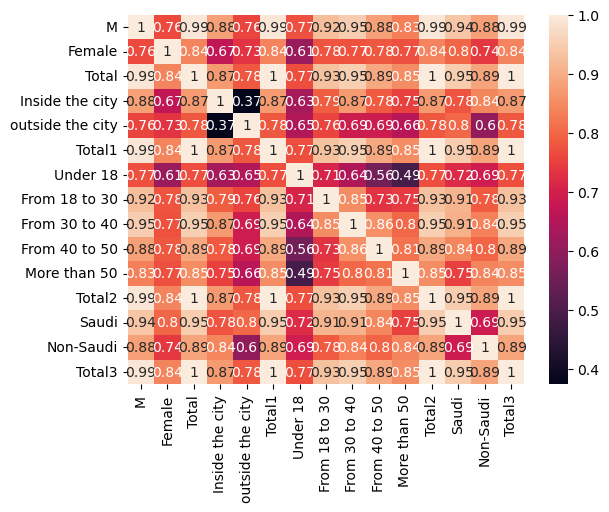

In [17]:
sns.heatmap(dj_droop.corr(), annot=True) ##  رسم توضيحي للعلاقات بين البيانات والترابط بينها للمصابين 

<Axes: >

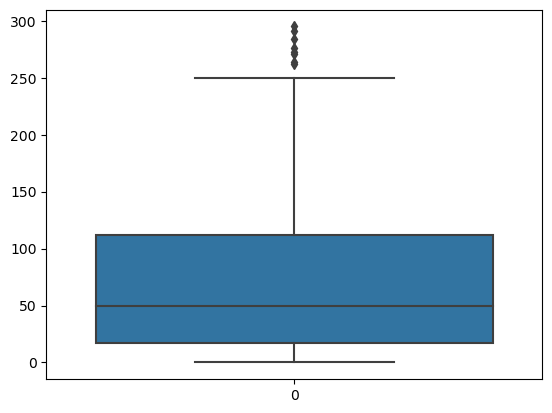

In [18]:
sns.boxplot(data=dj['Inside the city']) ## رسم توصيحي لاحد الاعمده واظهار البيانات الخاصه به من اعلى قيمه واقل قيمه  والمتوسط وايضا القيم المتطرفة لها 

<Axes: xlabel='Female', ylabel='Count'>

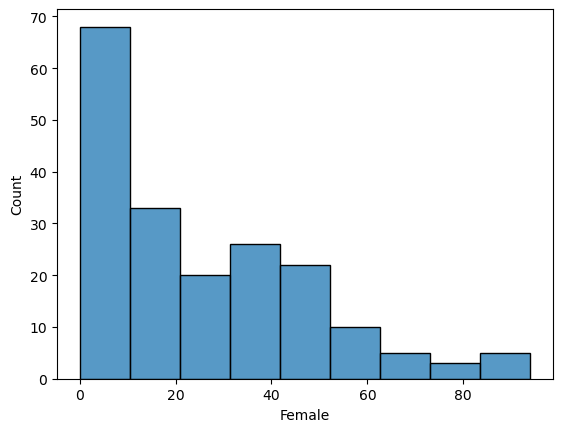

In [19]:
sns.histplot(dj_droop["Female"])  ##  يوضح توزيع البيانات  في عمود واحد واتضح انها علاقة عكسيه  

## deaths file

In [20]:
df['region'].rename({'الرياض- عدد الأشخاص المصابين حسب الجنس':'Riyadh', 'القريات':'Qurayyat',
                                'المدينه المنوره- عــد د الأشخاص المصابين حسب الجنس':'Madinah',
                                'الشرقيه- عــدد الأشخاص المصابين حسب الجنس':'Eastern_Province',
                                'الحـــدو د الشماليه- عــدد الأشخاص المصابين حسب الجنس':'Northern_border','تبوك':'Tabuk',
                                'الجوف':'Al-Jouf','حائل':'Hail','نجران':'Najran','القصيم':'Qassim','الباحه':'Albaha',
                                'عسير':'Assir','جازان':'Jazan','جده':'Jeddah', 'الطائف':'Taif','العاصمه':'Makkah'},inplace = True)
df
## اعادة تسمية عمود  المنطقة 

,months,region,men,female,total,in city,out city,total1,less than18,from18to30,from30to40,from40to50,more than 50,total2,saudi,notsaudi,total3
0,محرم,Riyadh,95.0,5.0,100.0,54.0,46.0,100.0,9.0,38.0,27.0,12.0,14.0,100.0,46.0,54.0,100.0
1,صفر,Riyadh,93.0,5.0,98.0,57.0,41.0,98.0,9.0,38.0,25.0,14.0,12.0,98.0,46.0,52.0,98.0
2,ربيع أول,Riyadh,94.0,11.0,105.0,49.0,56.0,105.0,22.0,13.0,35.0,24.0,11.0,105.0,59.0,46.0,105.0
3,ربيع ثانى,Riyadh,85.0,6.0,91.0,46.0,45.0,91.0,29.0,22.0,19.0,13.0,8.0,91.0,49.0,42.0,91.0
4,جمادى أول,Riyadh,95.0,1.0,96.0,51.0,45.0,96.0,15.0,35.0,26.0,12.0,8.0,96.0,52.0,44.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,شعبان,alqriyat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,رمضان,alqriyat,5.0,3.0,8.0,0.0,8.0,8.0,1.0,3.0,1.0,0.0,3.0,8.0,3.0,5.0,8.0
206,شوال,alqriyat,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0
207,ذى القعدة,alqriyat,4.0,0.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,1.0,4.0,4.0,0.0,4.0


In [21]:
df['months'].replace({'محرم':'Muharram', 'صفر':'Safar','ربيع أول':'Rabi_Awal','ربيع ثانى':'Rabie_Thani',
                               'جمادى أول':'Jumada-Awal','جمادى ثانى':'Jumada-Thani','رجب':'Rajab','شعبان':'Shabaan',
                               'رمضان':'Ramadan','شوال':'Shawal','ذى القعدة':'Dhu-AlQadah','ذى الحجة':'Dhul-Hijjah'},
                                inplace = True)
df           
## تعديل مسميات الاشهر الى اللغه الانجليزية 

,months,region,men,female,total,in city,out city,total1,less than18,from18to30,from30to40,from40to50,more than 50,total2,saudi,notsaudi,total3
0,Muharram,Riyadh,95.0,5.0,100.0,54.0,46.0,100.0,9.0,38.0,27.0,12.0,14.0,100.0,46.0,54.0,100.0
1,Safar,Riyadh,93.0,5.0,98.0,57.0,41.0,98.0,9.0,38.0,25.0,14.0,12.0,98.0,46.0,52.0,98.0
2,Rabi_Awal,Riyadh,94.0,11.0,105.0,49.0,56.0,105.0,22.0,13.0,35.0,24.0,11.0,105.0,59.0,46.0,105.0
3,Rabie_Thani,Riyadh,85.0,6.0,91.0,46.0,45.0,91.0,29.0,22.0,19.0,13.0,8.0,91.0,49.0,42.0,91.0
4,Jumada-Awal,Riyadh,95.0,1.0,96.0,51.0,45.0,96.0,15.0,35.0,26.0,12.0,8.0,96.0,52.0,44.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Shabaan,alqriyat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,Ramadan,alqriyat,5.0,3.0,8.0,0.0,8.0,8.0,1.0,3.0,1.0,0.0,3.0,8.0,3.0,5.0,8.0
206,Shawal,alqriyat,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0
207,Dhu-AlQadah,alqriyat,4.0,0.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,1.0,4.0,4.0,0.0,4.0


In [22]:
df.rename(columns={"region":"Region", "months":"the month"},inplace=True)  ## اعادة تسمية عمود المنطقة والاشهر لتوحيد الصيغة
df

,the month,Region,men,female,total,in city,out city,total1,less than18,from18to30,from30to40,from40to50,more than 50,total2,saudi,notsaudi,total3
0,Muharram,Riyadh,95.0,5.0,100.0,54.0,46.0,100.0,9.0,38.0,27.0,12.0,14.0,100.0,46.0,54.0,100.0
1,Safar,Riyadh,93.0,5.0,98.0,57.0,41.0,98.0,9.0,38.0,25.0,14.0,12.0,98.0,46.0,52.0,98.0
2,Rabi_Awal,Riyadh,94.0,11.0,105.0,49.0,56.0,105.0,22.0,13.0,35.0,24.0,11.0,105.0,59.0,46.0,105.0
3,Rabie_Thani,Riyadh,85.0,6.0,91.0,46.0,45.0,91.0,29.0,22.0,19.0,13.0,8.0,91.0,49.0,42.0,91.0
4,Jumada-Awal,Riyadh,95.0,1.0,96.0,51.0,45.0,96.0,15.0,35.0,26.0,12.0,8.0,96.0,52.0,44.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Shabaan,alqriyat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,Ramadan,alqriyat,5.0,3.0,8.0,0.0,8.0,8.0,1.0,3.0,1.0,0.0,3.0,8.0,3.0,5.0,8.0
206,Shawal,alqriyat,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0
207,Dhu-AlQadah,alqriyat,4.0,0.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,1.0,4.0,4.0,0.0,4.0


In [23]:
df.isnull().sum().sum()# حذف جميع الخانات الفارغة من الملف 

259

In [24]:
df.dropna(inplace=True) ## حذف جميع الخانات الفارغة من الملف 

In [25]:
df_clean=df.dropna(inplace=True)  # اعادة الامر للتأكد من حذف البيانات الفارغه 

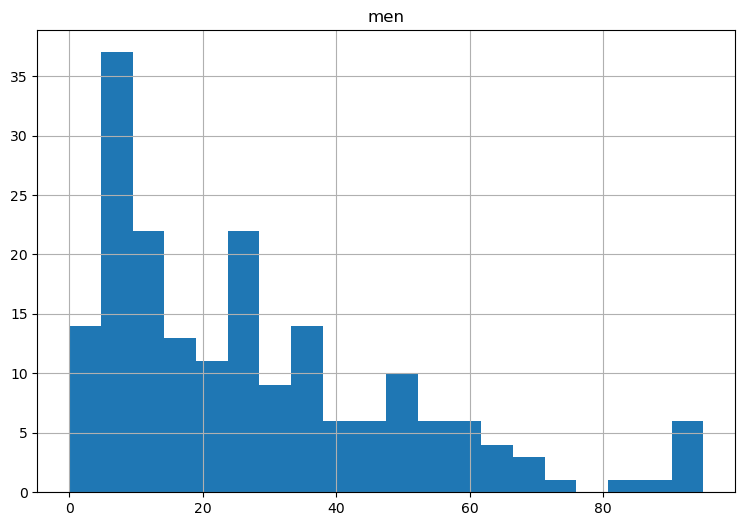

In [26]:
df.hist(column='men',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20) ;        # Number of histogram bins
##  لعمل تخصيص المظهر للتكرار في عمود الذكور 

In [27]:
df.shape[1] ## عدد الاعمده

17

In [28]:
df.shape[0] ## عدد الصفوف

192

In [29]:
list(df.columns) ## عرض مسميات الاعمده للتاكد من ترتيبها 

['the month',
 'Region',
 'men',
 'female',
 'total',
 'in city',
 'out city',
 'total1',
 'less than18',
 'from18to30',
 'from30to40',
 'from40to50',
 'more than 50',
 'total2',
 'saudi',
 'notsaudi',
 'total3']

In [30]:
print(df.columns) ## استخدام اكثر من طريقة لعرض مسميات الاعمده

Index(['the month', 'Region', 'men', 'female', 'total', 'in city', 'out city',
       'total1', 'less than18', 'from18to30', 'from30to40', 'from40to50',
       'more than 50', 'total2', 'saudi', 'notsaudi', 'total3'],
      dtype='object')


In [31]:
df.convert_dtypes(int)  ##   تحويل البيانات  ليتم اجراء عليها بعض العمليات 

,the month,Region,men,female,total,in city,out city,total1,less than18,from18to30,from30to40,from40to50,more than 50,total2,saudi,notsaudi,total3
0,Muharram,Riyadh,95,5,100,54,46,100,9,38,27,12,14,100,46,54,100
1,Safar,Riyadh,93,5,98,57,41,98,9,38,25,14,12,98,46,52,98
2,Rabi_Awal,Riyadh,94,11,105,49,56,105,22,13,35,24,11,105,59,46,105
3,Rabie_Thani,Riyadh,85,6,91,46,45,91,29,22,19,13,8,91,49,42,91
4,Jumada-Awal,Riyadh,95,1,96,51,45,96,15,35,26,12,8,96,52,44,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Shabaan,alqriyat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,Ramadan,alqriyat,5,3,8,0,8,8,1,3,1,0,3,8,3,5,8
206,Shawal,alqriyat,1,1,2,0,2,2,1,0,1,0,0,2,2,0,2
207,Dhu-AlQadah,alqriyat,4,0,4,0,4,4,0,3,0,0,1,4,4,0,4


In [32]:
df.describe().T     ## صيغة امر اخرى لمعرفة اعلى قيمه واقل قيمه والمتوسط والانحراف المعياري والنسب المختاره  

,count,mean,std,min,25%,50%,75%,max
men,192.0,27.578125,22.500125,0.0,9.00,22.5,38.00,95.0
female,192.0,3.802083,4.479435,0.0,1.00,2.0,6.00,40.0
total,192.0,31.380208,24.604435,0.0,11.00,26.0,45.25,105.0
in city,192.0,10.203125,11.037081,0.0,3.00,6.0,13.00,57.0
out city,192.0,21.177083,17.585391,0.0,7.00,14.0,34.00,68.0
total1,192.0,31.380208,24.604435,0.0,11.00,26.0,45.25,105.0
less than18,192.0,4.380208,5.047027,0.0,1.00,3.0,6.00,35.0
from18to30,192.0,10.197917,8.756891,0.0,4.00,8.0,13.00,40.0
from30to40,192.0,7.541667,6.451457,0.0,3.00,6.0,11.00,35.0
from40to50,192.0,4.307292,4.068053,0.0,1.00,3.0,6.00,24.0


In [33]:
df.tail(3) ## عرض اخر ثلاثه صفوف للتاكد من قراءة البيانات بشكل صحيح

,the month,Region,men,female,total,in city,out city,total1,less than18,from18to30,from30to40,from40to50,more than 50,total2,saudi,notsaudi,total3
206,Shawal,alqriyat,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0
207,Dhu-AlQadah,alqriyat,4.0,0.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,1.0,4.0,4.0,0.0,4.0
208,Dhul-Hijjah,alqriyat,6.0,2.0,8.0,0.0,8.0,8.0,2.0,2.0,1.0,2.0,1.0,8.0,7.0,1.0,8.0


In [34]:
df.info()  ## عرض معلومات تفصيليه عن الملف وبياناته 

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 208
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   the month     192 non-null    object 
 1   Region        192 non-null    object 
 2   men           192 non-null    float64
 3   female        192 non-null    float64
 4   total         192 non-null    float64
 5   in city       192 non-null    float64
 6   out city      192 non-null    float64
 7   total1        192 non-null    float64
 8   less than18   192 non-null    float64
 9   from18to30    192 non-null    float64
 10  from30to40    192 non-null    float64
 11  from40to50    192 non-null    float64
 12  more than 50  192 non-null    float64
 13  total2        192 non-null    float64
 14  saudi         192 non-null    float64
 15  notsaudi      192 non-null    float64
 16  total3        192 non-null    float64
dtypes: float64(15), object(2)
memory usage: 27.0+ KB


In [35]:
df.sample(5) ## اخذ عينة بيانات من الملف للتاكد من قراءه البيانات بشكل صحيح

,the month,Region,men,female,total,in city,out city,total1,less than18,from18to30,from30to40,from40to50,more than 50,total2,saudi,notsaudi,total3
136,Jumada-Awal,Assir,40.0,9.0,49.0,5.0,44.0,49.0,6.0,16.0,11.0,7.0,9.0,49.0,34.0,15.0,49.0
172,Safar,Taif,28.0,0.0,28.0,5.0,23.0,28.0,2.0,7.0,8.0,7.0,4.0,28.0,14.0,14.0,28.0
55,Safar,Tabuk,22.0,1.0,23.0,10.0,13.0,23.0,3.0,13.0,1.0,2.0,4.0,23.0,18.0,5.0,23.0
32,Jumada-Awal,Eastern_Province,36.0,4.0,40.0,13.0,27.0,40.0,3.0,12.0,11.0,5.0,9.0,40.0,22.0,18.0,40.0
31,Rabie_Thani,Eastern_Province,67.0,12.0,79.0,23.0,56.0,79.0,11.0,29.0,22.0,7.0,10.0,79.0,43.0,36.0,79.0


In [36]:
df.mode() ## لاستعراض Nan

,the month,Region,men,female,total,in city,out city,total1,less than18,from18to30,from30to40,from40to50,more than 50,total2,saudi,notsaudi,total3
0,Dhu-AlQadah,Al-Jouf,6.0,1.0,9.0,2.0,4.0,9.0,1.0,7.0,3.0,1.0,0.0,9.0,7.0,2.0,9.0
1,Dhul-Hijjah,Albaha,NaN,NaN,14.0,3.0,8.0,14.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,14.0
2,Jumada-Awal,Assir,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jumada-Thani,Eastern_Province,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Muharram,Hail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rabi_Awal,Jazan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Rabie_Thani,Jeddah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Rajab,Madinah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ramadan,Makkah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Safar,Najran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


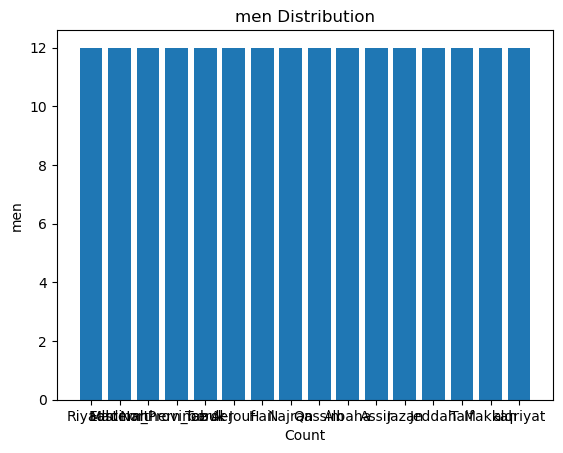

In [37]:
#Visualize Sex/ Gender ##تمثيل بيانات الذكور بشكل مرئي لفهمها وتحليلها بشكل أفضل وعمل مخطط لها باستخدام الداله (plt)
gender_count = df['Region'].value_counts()
plt.bar(gender_count.index, gender_count.values)
plt.xlabel('Count')
plt.ylabel('men')
plt.title('men Distribution')
plt.show()

<Axes: >

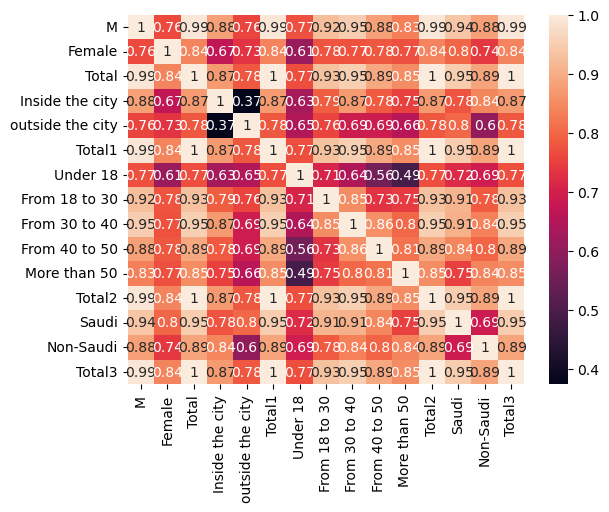

In [38]:
sns.heatmap(dj_droop.corr(), annot=True)## رسم توضيحي للعلاقات بين البيانات والترابط بينها للوفيات

C:\Users\dohan\AppData\Local\Temp\ipykernel_19904\2207327896.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.female)
C:\Users\dohan\AppData\Local\Temp\ipykernel_19904\2207327896.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.men)
C:\Users\dohan\AppData\Local\Temp\ipykernel_19904\2

<Axes: xlabel='men', ylabel='Density'>

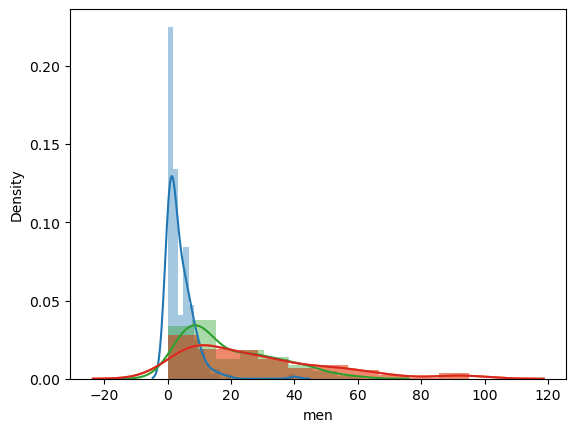

In [39]:
sns.set_style() ## استخدمت هذه الداله لمعرفة كثافة البيانات للذكور والاناث السعوديين  من خلا المحاور السيني والصادي
sns.distplot(df.female)
sns.distplot(df.men)
sns.distplot(df.saudi)
sns.distplot(df.men)

<Axes: xlabel='men', ylabel='Region'>

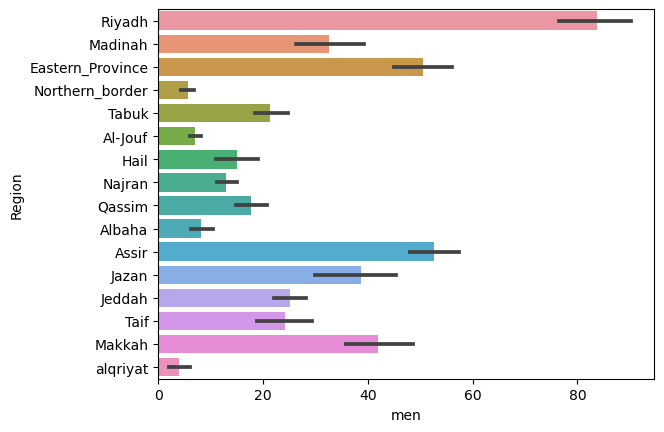

In [40]:
sns.barplot(x='men',y='Region',data=df) ## توضيح القيم للرجال في جميع المناطق وتبين ان الرياض اعلى قيمه  

C:\Users\dohan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


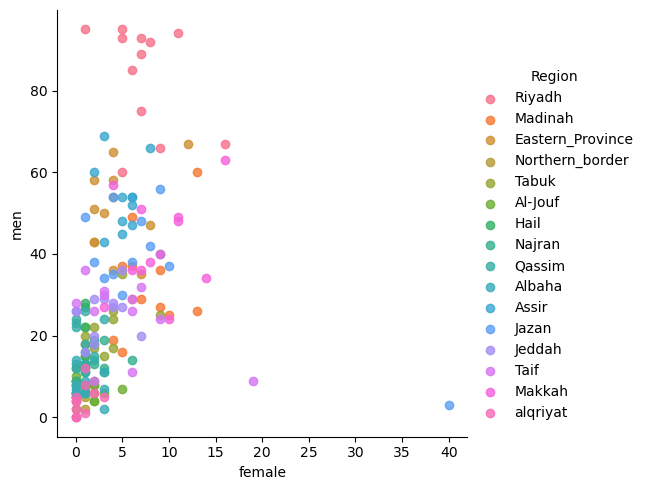

In [41]:
sns.lmplot(x='female' , y='men', data= df,fit_reg=False ,hue='Region') ## استخدمت هذه الداله  لرسم بيانات الذكور والاناث في جميع المناطق لتمثل أفضل انحدار خطي لها

In [42]:
dmerge=pd.merge(df,dj,on=["Region","the month"], how="left") ## دمج ملفين لمطابقة القيم وعمل الرسومات اللازمه 
dmerge

,the month,Region,men,female,total,in city,out city,total1,less than18,from18to30,...,Total1,Under 18,From 18 to 30,From 30 to 40,From 40 to 50,More than 50,Total2,Saudi,Non-Saudi,Total3
0,Muharram,Riyadh,95.0,5.0,100.0,54.0,46.0,100.0,9.0,38.0,...,393.0,66.0,97.0,126.0,73.0,31.0,393.0,213.0,180.0,393.0
1,Safar,Riyadh,93.0,5.0,98.0,57.0,41.0,98.0,9.0,38.0,...,433.0,44.0,117.0,145.0,79.0,48.0,433.0,271.0,162.0,433.0
2,Rabi_Awal,Riyadh,94.0,11.0,105.0,49.0,56.0,105.0,22.0,13.0,...,455.0,115.0,124.0,108.0,89.0,19.0,455.0,278.0,177.0,455.0
3,Rabie_Thani,Riyadh,85.0,6.0,91.0,46.0,45.0,91.0,29.0,22.0,...,427.0,132.0,119.0,103.0,51.0,22.0,427.0,238.0,189.0,427.0
4,Jumada-Awal,Riyadh,95.0,1.0,96.0,51.0,45.0,96.0,15.0,35.0,...,358.0,61.0,111.0,89.0,52.0,45.0,358.0,207.0,151.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Shabaan,alqriyat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,Ramadan,alqriyat,5.0,3.0,8.0,0.0,8.0,8.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Shawal,alqriyat,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Dhu-AlQadah,alqriyat,4.0,0.0,4.0,0.0,4.0,4.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

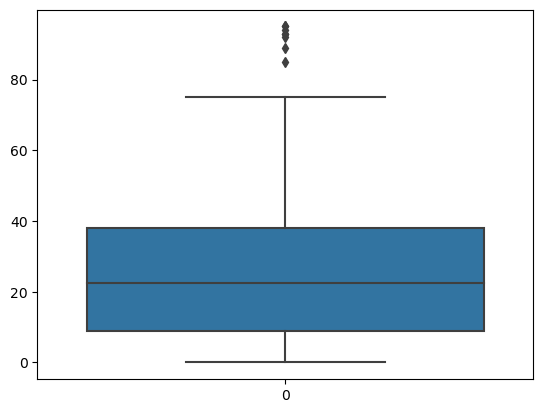

In [43]:
sns.boxplot(data=df['men'])  ##توضيح القيم لعمود الذكور لمعرفة القيم المتطرفة واعلى قيمه واصغر قيمه 